In [54]:
#setting up my usual packages
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import sys
import operator
from scipy import stats
import requests
from IPython.display import HTML
import matplotlib as plt
import pylab as pl
import scipy as sp
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import geopandas as gpd
from shapely.geometry import Point
from fiona.crs import from_epsg
import geopandas.tools
from pandas import DataFrame

try: 
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [55]:
PUIdata = os.getenv('PUIDATA')
print (PUIdata)

/home/cusp/rxl204/PUIdata


In [56]:
url = 'https://health.data.ny.gov/api/views/7iwk-yzcj/rows.csv?accessType=DOWNLOAD'
filename = 'hospital12.csv'

if not os.path.isfile(PUIdata + '/' + filename):
    print('Downloading...')
    os.system('wget ' + url)
    os.system('mv rows.csv?accessType=DOWNLOAD ' + filename)
    os.system('mv ' + filename + ' ' + PUIdata)
    if os.path.isfile(PUIdata + '/' + filename):
        print('File in place, proceed!')
else:
    print('File in place, proceed!')


File in place, proceed!


In [57]:
url = 'https://health.data.ny.gov/api/views/8uuc-49v9/rows.csv?accessType=DOWNLOAD'
filename = 'hospital13.csv'

if not os.path.isfile(PUIdata + '/' + filename):
    print('Downloading...')
    os.system('wget ' + url)
    os.system('mv rows.csv?accessType=DOWNLOAD ' + filename)
    os.system('mv ' + filename + ' ' + PUIdata)
    if os.path.isfile(PUIdata + '/' + filename):
        print('File in place, proceed!')
else:
    print('File in place, proceed!')


File in place, proceed!


In [58]:
url = 'https://health.data.ny.gov/api/views/wdtv-ip3j/rows.csv?accessType=DOWNLOAD'
filename = 'hospital14.csv'

if not os.path.isfile(PUIdata + '/' + filename):
    print('Downloading...')
    os.system('wget ' + url)
    os.system('mv rows.csv?accessType=DOWNLOAD ' + filename)
    os.system('mv ' + filename + ' ' + PUIdata)
    if os.path.isfile(PUIdata + '/' + filename):
        print('File in place, proceed!')
else:
    print('File in place, proceed!')


File in place, proceed!


In [59]:
dfh12 = pd.read_csv(PUIdata + '/hospital12.csv')
dfh13 = pd.read_csv(PUIdata + '/hospital13.csv')
dfh14 = pd.read_csv(PUIdata + '/hospital14.csv')

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
dfh12.shape

(35089, 37)

In [61]:
dfh1214 = pd.concat([dfh12, dfh13, dfh14])
dfh1214.shape

(107468, 37)

In [62]:
dfh1214.columns

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [63]:
dfh1214 = dfh1214[['Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity','APR Severity of Illness Code']]
dfh1214.head()

,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,APR Severity of Illness Code
0,50 to 69,147,F,White,Not Span/Hispanic,1
1,0 to 17,147,M,White,Not Span/Hispanic,1
2,30 to 49,148,F,White,Not Span/Hispanic,2
3,50 to 69,148,F,White,Not Span/Hispanic,3
4,50 to 69,148,F,White,Not Span/Hispanic,4


## Exploratory Analysis 
1. Identify asthma hospitalisation counts by age group

In [64]:
dfh1214.groupby('Age Group').count()

,Zip Code - 3 digits,Gender,Race,Ethnicity,APR Severity of Illness Code
Age Group,,,,,
0 to 17,34730,34740,34740,34740,34740
18 to 29,6299,6301,6301,6301,6301
30 to 49,18297,18303,18303,18303,18303
50 to 69,30564,30572,30572,30572,30572
70 or Older,17537,17552,17552,17552,17552


In [65]:
dfh1214.groupby('Gender').count()

,Age Group,Zip Code - 3 digits,Race,Ethnicity,APR Severity of Illness Code
Gender,,,,,
F,64167,64142,64167,64167,64167
M,43301,43285,43301,43301,43301


In [66]:
url = 'https://data.cityofnewyork.us/api/views/uvpi-gqnh/rows.csv?accessType=DOWNLOAD'
filename = 'tree.csv'

if not os.path.isfile(PUIdata + '/' + filename):
    print('Downloading...')
    os.system('wget ' + url)
    os.system('mv rows.csv?accessType=DOWNLOAD ' + filename)
    os.system('mv ' + filename + ' ' + PUIdata)
    if os.path.isfile(PUIdata + '/' + filename):
        print('File in place, proceed!')
else:
    print('File in place, proceed!')


File in place, proceed!


In [67]:
#read files
df = pd.read_csv(PUIdata + '/tree.csv')
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [68]:
df.shape

(683788, 45)

In [69]:
#check most common tree types
tree_sort = df.spc_common.value_counts().reset_index().sort(ascending=[False])
tree_sort.columns = ['Tree Type', 'Count']
tree_sort

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


,Tree Type,Count
0,London planetree,87014
1,honeylocust,64264
2,Callery pear,58931
3,pin oak,53185
4,Norway maple,34189
5,littleleaf linden,29742
6,cherry,29279
7,Japanese zelkova,29258
8,ginkgo,21024
9,Sophora,19338


In [70]:
tree_sort['ID'] = tree_sort.index
tree_sort.head()

,Tree Type,Count,ID
0,London planetree,87014,0
1,honeylocust,64264,1
2,Callery pear,58931,2
3,pin oak,53185,3
4,Norway maple,34189,4


In [71]:
tree_id = tree_sort[['Tree Type', 'ID']]
tree_id.head()

,Tree Type,ID
0,London planetree,0
1,honeylocust,1
2,Callery pear,2
3,pin oak,3
4,Norway maple,4


In [72]:
#merge back to df to assign ID to tree type 
df = df.merge(tree_id, left_on='spc_common', right_on='Tree Type')
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl', 'Tree Type', 'ID'],
      dtype='object')

In [73]:
#read in nyc zipcode shapefile
zipsNYC = gp.GeoDataFrame.from_file("data/ZIP_CODE_040114.shp")
zipsNYC.crs = from_epsg(2263) 
zipsNYC.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [74]:
df["geometry"] = df.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)
# Convert to a GeoDataFrame
df = gpd.GeoDataFrame(df, geometry="geometry")
df.crs = zipsNYC.crs

In [81]:
zipsNYC.crs

{'init': 'epsg:4326'}

In [77]:
df.crs = {'init' :'epsg:4326'}
zipsNYC.crs = {'init' :'epsg:4326'}

In [78]:
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,longitude,x_sp,y_sp,council district,census tract,bin,bbl,Tree Type,ID,geometry
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09,red maple,10,POINT (-73.84421522 40.72309177)
1,184031,504204,08/29/2015,3,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,-73.903561,1.010930e+06,249304.4860,15.0,23502.0,2007746.0,2.028120e+09,red maple,10,POINT (-73.90356058 40.85091786)
2,208974,414958,09/08/2015,10,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,-74.106535,9.546483e+05,143693.7225,50.0,12806.0,5056270.0,5.040570e+09,red maple,10,POINT (-74.10653494 40.56103243)
3,198146,411699,09/02/2015,6,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,-74.192553,9.307302e+05,135842.1792,51.0,17009.0,5092500.0,5.063120e+09,red maple,10,POINT (-74.19255287 40.53936939)
4,198230,411696,09/02/2015,10,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,-74.192161,9.308391e+05,135842.1992,51.0,17009.0,5092499.0,5.063120e+09,red maple,10,POINT (-74.19216109 40.5393701)


Text(0.5,1,'Tree Species Across New York City')

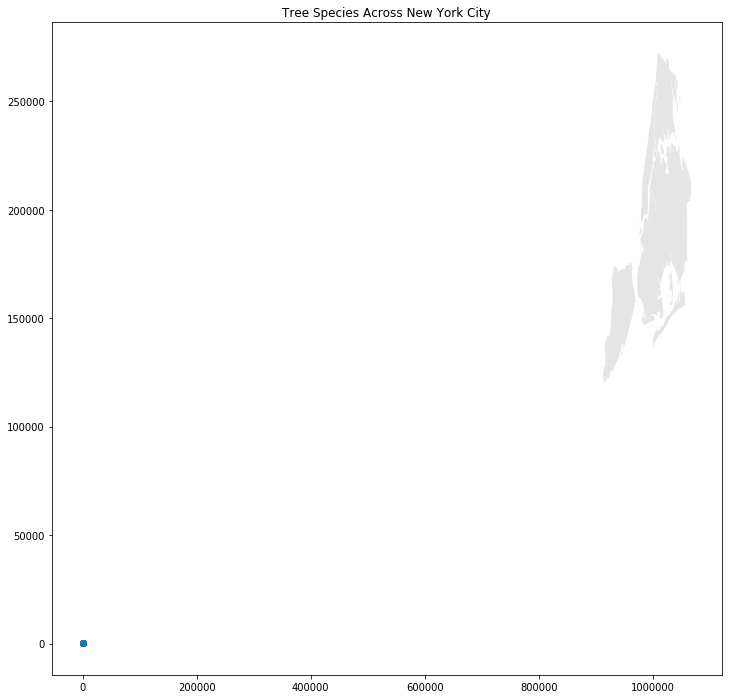

In [79]:
#plot shapefile as basemap 
#overlap with counts of pine tree in each zipcode
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
zipsNYC.plot(ax=ax, color='black', alpha=0.1)
df.plot(ax=ax,legend=True);
plt.title('Tree Species Across New York City', size=12)

London planetrees are the most common type of trees in the city. it also commonly cited as the tree type that triggers respiratory problems such as asthma

https://www.asthmafoundation.org.nz/your-health/living-with-asthma/common-asthma-triggers

In [6]:
#filter data to include only plane trees
df = df.loc[df['spc_common'] == 'London planetree']
df.head()


,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
9,192755,207508,08/31/2015,21,0,OffsetFromCurb,Alive,Fair,Platanus x acerifolia,London planetree,...,3037402,New York,40.586357,-73.969744,9.926537e+05,152903.6306,47.0,37402.0,3320727.0,3.072350e+09
10,203719,302371,09/05/2015,11,0,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,...,4010500,New York,40.782428,-73.911171,1.008850e+06,224349.0366,22.0,105.0,4019061.0,4.008710e+09
11,203726,302371,09/05/2015,8,0,OnCurb,Alive,Poor,Platanus x acerifolia,London planetree,...,4010500,New York,40.781735,-73.912020,1.008615e+06,224096.2740,22.0,105.0,4019059.0,4.008710e+09
12,195202,415896,09/01/2015,13,0,OnCurb,Alive,Fair,Platanus x acerifolia,London planetree,...,5014607,New York,40.557103,-74.162670,9.390480e+05,142285.9579,51.0,14607.0,5072852.0,5.054910e+09
13,189465,219493,08/30/2015,22,0,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,...,3019100,New York,40.694733,-73.968211,9.930653e+05,192388.0651,35.0,191.0,3054331.0,3.018880e+09


In [7]:
#check number of records
df.shape

(87014, 45)

In [8]:
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [9]:
dfg= df.groupby('postcode')['spc_common'].count()
dfg.head()

postcode
83        54
10001     21
10002    388
10003    133
10004      8
Name: spc_common, dtype: int64

In [10]:
dfg = dfg.to_frame().reset_index()
dfg.head()

,postcode,spc_common
0,83,54
1,10001,21
2,10002,388
3,10003,133
4,10004,8


In [12]:
#read in nyc zipcode shapefile
zipsNYC = gp.GeoDataFrame.from_file("data/ZIP_CODE_040114.shp")
zipsNYC.crs = from_epsg(2263) 
zipsNYC.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [13]:
zipsNYC.ZIPCODE = zipsNYC.ZIPCODE.astype(int)

In [14]:
#merge both based on zipcode
dfmap = pd.merge(zipsNYC, dfg, left_on='ZIPCODE', right_on='postcode')
dfmap

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,postcode,spc_common
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",11436,452
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",11213,413
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",11212,1067
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",11225,442
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,...",11218,1016
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,...",11226,327
6,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.3515269756 173946.4621963799,...",11219,890
7,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.0097044706 171110.0666224658,...",11210,688
8,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.2959063053 171240.7064530551,...",11230,1166
9,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.1699339747 170730.1687602103,...",11204,1365


Text(0.5,1,'Count of London Pine Trees Across New York City')

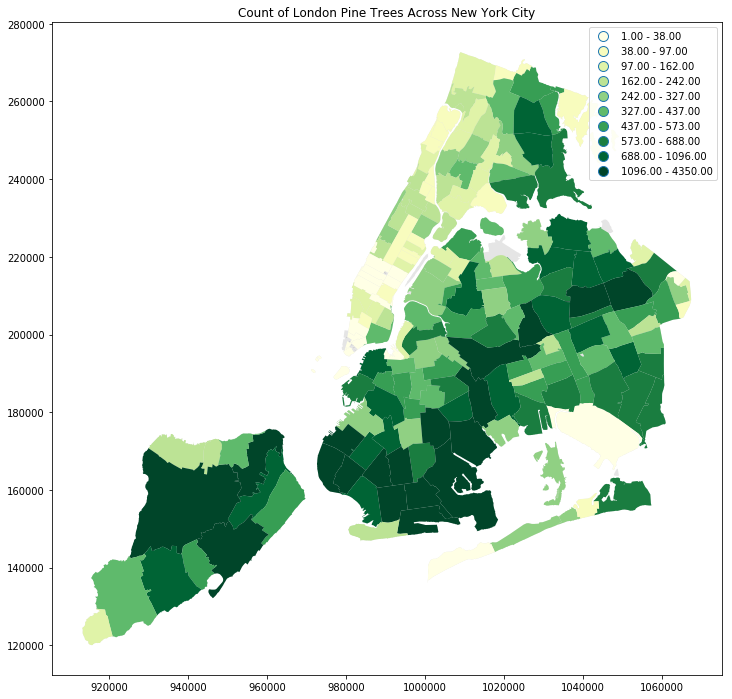

In [15]:
#plot shapefile as basemap 
#overlap with counts of pine tree in each zipcode
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
zipsNYC.plot(ax=ax, color='black', alpha=0.1)
dfmap.plot(ax=ax, column='spc_common',cmap='YlGn',scheme='quantiles',k=10,legend=True);
plt.title('Count of London Pine Trees Across New York City', size=12)

            Figure 1: Choropleth map of count of london pine trees in each zipcode

## Get zip code level asthma hospitalization rates

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
from __future__ import print_function
import operator
import requests
from IPython.display import HTML
import warnings
import geopandas as gpd
from fiona.crs import from_epsg
import os
import json
import sys
import statsmodels.formula.api as smf
from scipy import stats as st
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

%pylab inline

In [16]:
dfas = pd.read_csv('data/asthma.csv')
dfas.head()

,Unnamed: 0,ZipCode,Discharges_2012-2014,Dicharge_Rate
0,0,10001.0,159.0,21.9
1,1,10002.0,592.0,23.9
2,2,10003.0,130.0,7.7
3,6,10007.0,14.0,2.9
4,7,10009.0,534.0,28.3


In [18]:
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [21]:
dfjoin = dfg.merge(dfas, left_on = 'postcode', right_on = 'ZipCode')
dfjoin.head()

,postcode,spc_common,Unnamed: 0,ZipCode,Discharges_2012-2014,Dicharge_Rate
0,10001,21,0,10001.0,159.0,21.9
1,10002,388,1,10002.0,592.0,23.9
2,10003,133,2,10003.0,130.0,7.7
3,10007,5,6,10007.0,14.0,2.9
4,10009,165,7,10009.0,534.0,28.3


In [23]:
dfjoin = dfjoin[['postcode', 'spc_common','Discharges_2012-2014', 'Dicharge_Rate']]
dfjoin.head()

,postcode,spc_common,Discharges_2012-2014,Dicharge_Rate
0,10001,21,159.0,21.9
1,10002,388,592.0,23.9
2,10003,133,130.0,7.7
3,10007,5,14.0,2.9
4,10009,165,534.0,28.3


In [24]:
dfjoin.columns = ['postcode', 'pine_count', 'discharges_count', 'discharge_rate']
dfjoin.head()

,postcode,pine_count,discharges_count,discharge_rate
0,10001,21,159.0,21.9
1,10002,388,592.0,23.9
2,10003,133,130.0,7.7
3,10007,5,14.0,2.9
4,10009,165,534.0,28.3


In [25]:
#merge both based on zipcode
dfmapas = pd.merge(zipsNYC, dfjoin, left_on='ZIPCODE', right_on='postcode')
dfmapas

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,postcode,pine_count,discharges_count,discharge_rate
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",11436,452,153.0,27.5
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",11213,413,852.0,43.7
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",11212,1067,1567.0,59.5
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",11225,442,548.0,30.7
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,...",11218,1016,272.0,11.7
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,...",11226,327,1112.0,35.9
6,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.3515269756 173946.4621963799,...",11219,890,195.0,6.9
7,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.0097044706 171110.0666224658,...",11210,688,417.0,21.1
8,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.2959063053 171240.7064530551,...",11230,1166,293.0,11.7
9,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.1699339747 170730.1687602103,...",11204,1365,177.0,7.2


Text(0.5,1,'Count of Asthma Discharges Across New York City')

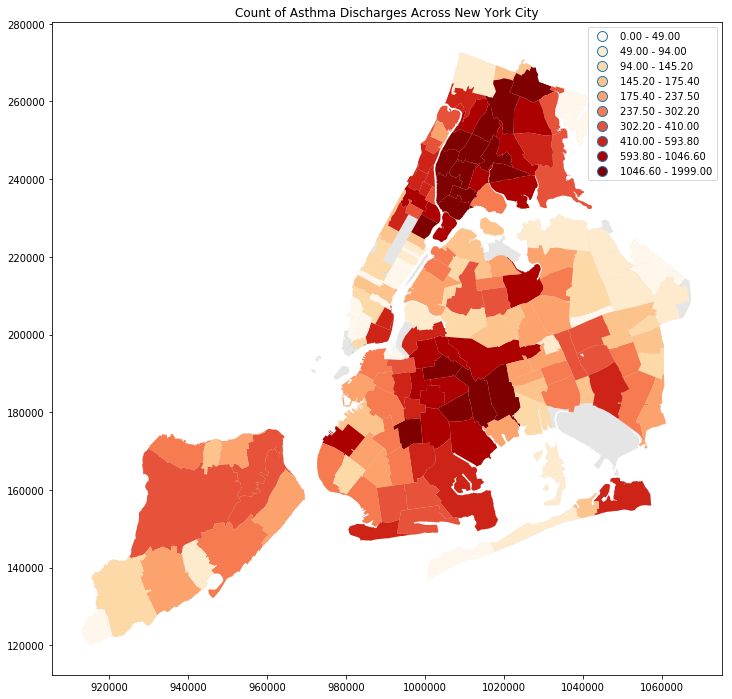

In [26]:
#plot shapefile as basemap 
#overlap with counts of pine tree in each zipcode
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
zipsNYC.plot(ax=ax, color='black', alpha=0.1)
dfmapas.plot(ax=ax, column='discharges_count',cmap='OrRd',scheme='quantiles',k=10,legend=True);
plt.title('Count of Asthma Discharges Across New York City', size=12)

In [48]:
dfjoin.corr()

,postcode,pine_count,discharges_count,discharge_rate
postcode,1.000000,0.356393,-0.104755,-0.170517
pine_count,0.356393,1.000000,0.064361,-0.130950
discharges_count,-0.104755,0.064361,1.000000,0.828060
discharge_rate,-0.170517,-0.130950,0.828060,1.000000


In [42]:
#Statistical significance threshold throughout: $\alpha = 0.05$
alpha = 0.05

In [47]:
pearsons = scipy.stats.pearsonr(dfjoin.discharges_count, dfjoin.pine_count)
print ("Pearson's test result", pearsons)
if pearsons[1] >= alpha: 
    print (r"The Null hypothesis that the count of pine trees are not related to asthma attacks " + 
           "cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the count of pine trees are not related to asthma attacks " + 
           "is rejected (p = %.3f<0.05)"%pearsons[1])


Pearson's test result (0.064360817572163428, 0.40297411912601866)
The Null hypothesis that the count of pine trees are not related to asthma attacks cannot be rejected (p>=0.05)


In [49]:
pearsons_rate = scipy.stats.pearsonr(dfjoin.discharge_rate, dfjoin.pine_count)
print ("Pearson's test result", pearsons_rate)
if pearsons_rate[1] >= alpha: 
    print (r"The Null hypothesis that the count of pine trees are not related to asthma attacks " + 
           "cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the count of pine trees are not related to asthma attacks " + 
           "is rejected (p = %.3f<0.05)"%pearsons_rate[1])


Pearson's test result (-0.13095044624757229, 0.087785117449824923)
The Null hypothesis that the count of pine trees are not related to asthma attacks cannot be rejected (p>=0.05)


In [ ]:
url = 'https://health.data.ny.gov/api/views/u4ud-w55t/rows.csv?accessType=DOWNLOAD'
filename = 'Hospital_Inpatient_Discharges__SPARCS_De-Identified___2012.csv'

if not os.path.isfile(PUIdata + '/' + filename):
    print('Downloading...')
    os.system('wget ' + url)
    os.system('mv rows.csv?accessType=DOWNLOAD ' + filename)
    os.system('mv ' + filename + ' ' + PUIdata)
    if os.path.isfile(PUIdata + '/' + filename):
        print('File in place, proceed!')
else:
    print('File in place, proceed!')


Downloading...
